# Exploratory Data Analysis using LLM and LangChain

- Author: **Manaranjan Pradhan**
- www.manaranjanp.com

## Introduction

In this tutorial, we will explore how to leverage LLM (Large Language Models) to do Exploratory Data Analysis (EDA), which is an important step in developing machine learning models.

We will use **[OpenAI](https://platform.openai.com/) as LLM** and **[Langchain](https://python.langchain.com/en/latest/index.html) framework** to orchestrate the prompts.

### Pre-requisite steps:

1. Sign up to OpenAI and get the API Key
   - Go to [platform.openai.com](https://platform.openai.com/) and sign in with an OpenAI account.
   - Click on profile icon at the top-right corner of the page and select "View API Keys."
   - Click "Create New Secret Key" to generate a new API key.
   - Make note of the key
2. Install **langchain** and **openai** libraries (steps are given below)


## Dataset:

A retrospective sample of males in a heart-disease high-risk region
of the Western Cape, South Africa. There are roughly two controls per
case of CHD. Many of the CHD positive men have undergone blood
pressure reduction treatment and other programs to reduce their risk
factors after their CHD event. In some cases the measurements were
made after these treatments. These data are taken from a larger
dataset, described in  Rousseauw et al, 1983, South African Medical
Journal.

- **sbp**		systolic blood pressure
- **tobacco**		cumulative tobacco (kg)
- **ldl**		low densiity lipoprotein cholesterol
- **adiposity**
- **famhist**		family history of heart disease (Present, Absent)
- **typea**		type-A behavior
- **obesity**
- **alcohol**		current alcohol consumption
- **age**		age at onset
- **chd**		response, coronary heart disease


https://hastie.su.domains/ElemStatLearn/datasets/SAheart.info.txt

## EDA Steps:

1. Getting meta data about the dataset
2. Finding missing values
3. Univariate Analysis like probability distribution, Histogram, box plot and outlier analysis
4. Hypothesis test (t-test to compare distributions)
5. Bivariate Analysis: Scatter plot, correlation analysis and heatmap

### Install required libraries

In [ ]:
!pip install langchain openai langchain_experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 kB 5.1 MB/s eta 0:00:00


### Import required libraries

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from getpass import getpass
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.llms import OpenAI

### Set the OpenAI key

In [ ]:
os.environ['OPENAI_API_KEY'] = getpass("OpenAI Key:")

OpenAI Key:··········


### Read the dataset

In [ ]:
chd_df = pd.read_csv('http://www-stat.stanford.edu/~tibs/ElemStatLearn/datasets/SAheart.data')

In [ ]:
chd_df.head(5)

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


### Configure the Langchain Agent

<img title="a title" alt="Alt text" src="agent.png" height='500' width='700'>

In [ ]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0),
                                      chd_df,
                                      verbose=True)

#### Which model?

In [ ]:
openai = OpenAI(temperature=0.0)

In [ ]:
openai.model_name

'text-davinci-003'

## Getting Metadata

### How many rows and columns?

In [ ]:
agent("how many rows and columns are present in the dataset?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of rows and columns
Action: python_repl_ast
Action Input: df.shape
Observation: (462, 11)
Thought: I now know the final answer
Final Answer: The dataset has 462 rows and 11 columns.

> Finished chain.


{'input': 'how many rows and columns are present in the dataset?',
 'output': 'The dataset has 462 rows and 11 columns.'}

#### Validate with our code

In [ ]:
chd_df.shape

(462, 11)

### Looking at few records

In [ ]:
results = agent("Sample 5 records and display")



> Entering new AgentExecutor chain...
Thought: I need to sample 5 records from the dataframe
Action: python_repl_ast
Action Input: df.sample(5)
Observation:      row.names  sbp  tobacco   ldl  adiposity  famhist  typea  obesity  \
410        412  178    20.00  9.78      33.55   Absent     37    27.29   
439        441  130     4.00  2.40      17.42   Absent     60    22.05   
458        460  182     4.20  4.41      32.10   Absent     52    28.61   
426        428  142     1.32  7.63      29.98  Present     57    31.16   
120        121  128     2.00  6.13      21.31   Absent     66    22.86   

     alcohol  age  chd  
410     2.88   62    1  
439     0.00   40    0  
458    18.72   52    1  
426    72.93   33    0  
120    11.83   60    0  
Thought: I now know the final answer
Final Answer: The sampled 5 records are: row.names 412, 441, 460, 428, and 121.

> Finished chain.


### Finding missing values

In [ ]:
results = agent("Are there any missing values in the dataset?")



> Entering new AgentExecutor chain...
Thought: I need to check each column for missing values
Action: python_repl_ast
Action Input: df.isnull().any()
Observation: row.names    False
sbp          False
tobacco      False
ldl          False
adiposity    False
famhist      False
typea        False
obesity      False
alcohol      False
age          False
chd          False
dtype: bool
Thought: I now know the final answer
Final Answer: No, there are no missing values in the dataset.

> Finished chain.


## Probability Distribution

### Finding Frequencies of Variables

In [ ]:
query = 'what are the unique values in the column chd?'

In [ ]:
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to find the unique values in the column chd
Action: python_repl_ast
Action Input: df['chd'].unique()
Observation: [1 0]
Thought: I now know the final answer
Final Answer: The unique values in the column chd are 1 and 0.

> Finished chain.


In [ ]:
query = 'What are the frequencies of the unique values in the column chd?'
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to find the unique values in the column chd and count how many times each appears.
Action: python_repl_ast
Action Input: df['chd'].value_counts()
Observation: 0    302
1    160
Name: chd, dtype: int64
Thought: I now know the final answer
Final Answer: 0: 302, 1: 160

> Finished chain.


In [ ]:
chd_df.chd.value_counts()

0    302
1    160
Name: chd, dtype: int64

### Finding Probability Distributions

In [ ]:
query = """What is the probability distribution of persons suffering from chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to calculate the probability of each value of chd.
Action: python_repl_ast
Action Input: df['chd'].value_counts(normalize=True)
Observation: 0    0.65368
1    0.34632
Name: chd, dtype: float64
Thought: I now know the final answer
Final Answer: The probability distribution of persons suffering from chd is 0.65368 for 0 and 0.34632 for 1.

> Finished chain.


In [ ]:
chd_df.chd.value_counts(normalize = True)

0    0.65368
1    0.34632
Name: chd, dtype: float64

In [ ]:
query = """Answer the query based on the following description.
1. If the value in chd column is 0, then it indicates the person is not suffering from chd.
Then how many person are suffering from chd who did not have any family history of chd?"""
results = agent(query)



> Entering new AgentExecutor chain...

Thought: I need to filter the dataframe to get the rows with chd = 1 and famhist = Absent
Action: python_repl_ast
Action Input: df[(df['chd'] == 1) & (df['famhist'] == 'Absent')].shape[0]
Observation: 64
Thought: I now know the final answer
Final Answer: 64 people are suffering from chd who did not have any family history of chd.

> Finished chain.


In [ ]:
pd.crosstab(chd_df.chd, chd_df.famhist)

famhist,Absent,Present
chd,,
0,206,96
1,64,96


### Conditional Probability

In [ ]:
query = """What is the probability that a person with no family history
of chd will suffer from chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to find out how many people with no family history of chd have chd.
Action: python_repl_ast
Action Input: df[df['famhist'] == 'Absent']['chd'].value_counts(normalize=True)
Observation: 0    0.762963
1    0.237037
Name: chd, dtype: float64
Thought: I now know the final answer
Final Answer: The probability that a person with no family history of chd will suffer from chd is 0.237037.

> Finished chain.


In [ ]:
pd.crosstab(chd_df.chd, chd_df.famhist, normalize = 'columns')

famhist,Absent,Present
chd,,
0,0.762963,0.5
1,0.237037,0.5


## Univariate Analysis

Univariate analysis in exploratory data analysis focuses on analyzing a single variable at a time. It involves examining the distribution, central tendency, dispersion, and other statistical properties of a single variable without considering its relationship with other variables. The main objective of univariate analysis is to understand the characteristics and patterns of individual variables in isolation.

Common techniques used in univariate analysis include:

- **Descriptive statistics**: Descriptive statistics provide measures that summarize and describe the main properties of a variable. These measures include measures of central tendency (mean, median, mode) that describe the typical or central value of the variable, and measures of dispersion (variance, standard deviation, range) that describe the spread or variability of the variable.

- **Histograms**: is a graphical representations of the distribution of a variable. They display the frequencies or counts of different values or intervals of the variable on a bar chart. Histograms help visualize the shape, skewness, and presence of any outliers in the variable's distribution.

- **Box plots**: it provide a visual summary of the distribution of a variable. They display the minimum, maximum, median, and quartiles of the variable's values. Box plots help identify the range of values, skewness, outliers, and potential differences between groups or categories.

- **Bar Plot**: is a graphical representation of categorical data using rectangular bars. It displays the frequencies or proportions of different categories or groups and provides a visual comparison between them. Bar plots are commonly used to present discrete data and show the distribution or relationship between variables.


### Creating a bar plot



> Entering new AgentExecutor chain...
Thought: I need to count the number of persons suffering from chd
Action: python_repl_ast
Action Input: df['chd'].value_counts()
Observation: 0    302
1    160
Name: chd, dtype: int64
Thought: I need to plot this data
Action: python_repl_ast
Action Input: df['chd'].value_counts().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar plot depicting the number of persons suffering from chd.

> Finished chain.


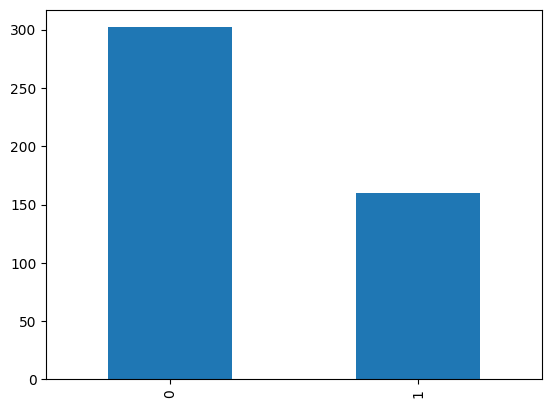

In [ ]:
query = """Draw a bar plot to depict number of persons suffering from chd?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to get the data for the bar plot
Action: python_repl_ast
Action Input: df.groupby(['famhist', 'chd']).size().unstack().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar plot depicting number of persons having family history of chd stacked by chd.

> Finished chain.


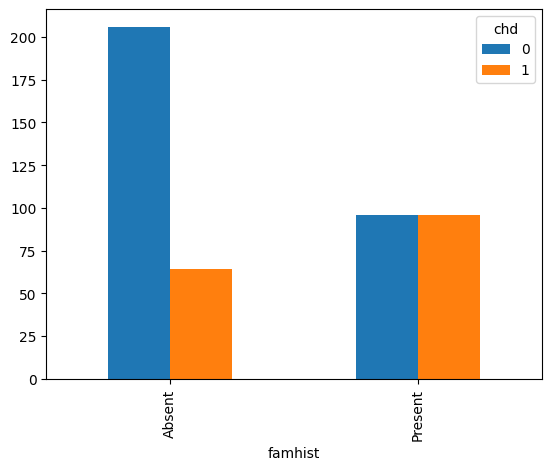

In [ ]:
query = """Draw a bar plot to depict number of persons having family
history of chd stacked by chd"""
results = agent(query)

## Things to try:

1. What is the probability that a person with no family history will suffer from chd?
2. Find out outliers in terms of alcohol consumption for those who are suffering fro chd using both standard deviation and box plot approach.
3. Create a scatter plot between age and ldl
4. Find out the correlation between age and sbp for those suffering from chd.
5. Create a heatmap showing correlation among a set of variables with divergent colors for positive and negative correlations.